In [2]:
from google.colab import files
import pandas as pd

# Upload the dataset manually
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("car_price_dataset.csv")

# Display first few rows
print(df.head())

# Check data types & missing values
print(df.info())

# Summary statistics
print(df.describe())


Saving car_price_dataset.csv to car_price_dataset (1).csv
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 

In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
df = df.drop_duplicates()
print(f"Dataset shape after dropping duplicates: {df.shape}")


Missing Values:
 Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64
Number of duplicate rows: 0
Dataset shape after dropping duplicates: (10000, 10)


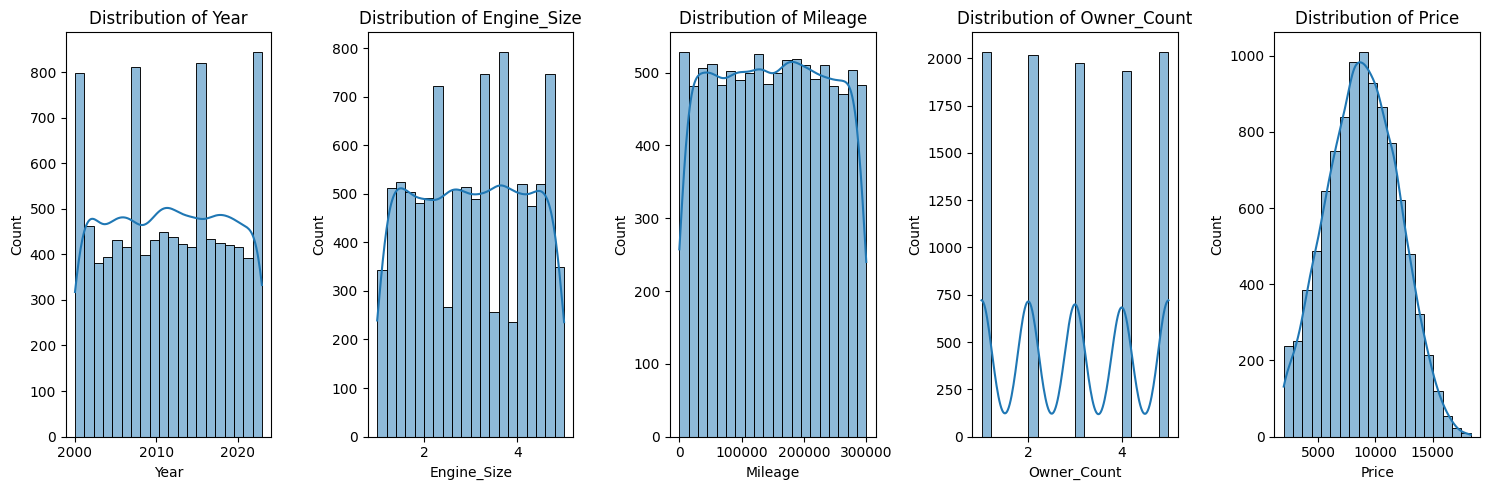

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(15, 5))

# Plot histograms for numerical features
numeric_cols = ['Year', 'Engine_Size', 'Mileage', 'Owner_Count', 'Price']
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features
label_encoders = {}
for col in ['Brand', 'Model', 'Fuel_Type', 'Transmission']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Check the transformed dataset
print(df.head())


   Brand  Model  Year  Engine_Size  Fuel_Type  Transmission  Mileage  Doors  \
0      6     24  2020          4.2          0             1   289944      3   
1      2     19  2012          2.0          2             0     5356      2   
2      7     16  2020          4.2          0             0   231440      4   
3      0     22  2023          2.0          1             1   160971      2   
4      9     17  2003          2.6          2             2   286618      3   

   Owner_Count  Price  
0            5   8501  
1            3  12092  
2            2  11171  
3            1  11780  
4            3   2867  


In [13]:
for col in ["Brand", "Model", "Fuel_Type", "Transmission"]:
    classes = label_encoders[col].classes_
    print(f"{col} classes:")
    for i, c in enumerate(classes):
        print(f"{i} -> {c}")
    print("-"*30)


Brand classes:
0 -> Audi
1 -> BMW
2 -> Chevrolet
3 -> Ford
4 -> Honda
5 -> Hyundai
6 -> Kia
7 -> Mercedes
8 -> Toyota
9 -> Volkswagen
------------------------------
Model classes:
0 -> 3 Series
1 -> 5 Series
2 -> A3
3 -> A4
4 -> Accord
5 -> C-Class
6 -> CR-V
7 -> Camry
8 -> Civic
9 -> Corolla
10 -> E-Class
11 -> Elantra
12 -> Equinox
13 -> Explorer
14 -> Fiesta
15 -> Focus
16 -> GLA
17 -> Golf
18 -> Impala
19 -> Malibu
20 -> Optima
21 -> Passat
22 -> Q5
23 -> RAV4
24 -> Rio
25 -> Sonata
26 -> Sportage
27 -> Tiguan
28 -> Tucson
29 -> X5
------------------------------
Fuel_Type classes:
0 -> Diesel
1 -> Electric
2 -> Hybrid
3 -> Petrol
------------------------------
Transmission classes:
0 -> Automatic
1 -> Manual
2 -> Semi-Automatic
------------------------------


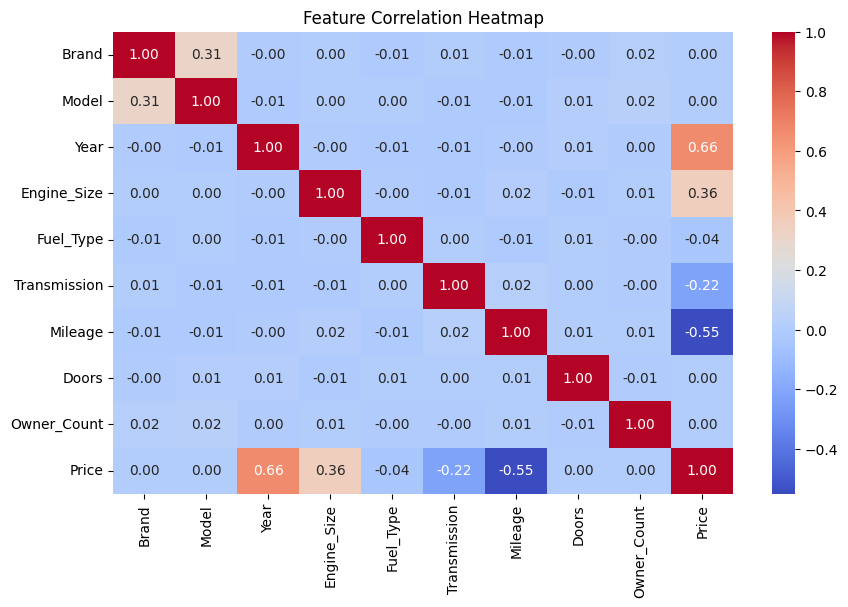

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Define features & target
X = df.drop("Price", axis=1)  # Features
y = df["Price"]  # Target variable

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (8000, 9)
Testing set size: (2000, 9)


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 370.67
Mean Squared Error (MSE): 218650.80
R² Score: 0.98


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Training Random Forest...
Training Linear Regression...
Training Gradient Boosting...
Training XGBoost...

Model Performance Comparison:
                          MAE            MSE  R² Score
Random Forest      370.668370  218650.796854  0.976202
Linear Regression  793.477135  818588.252890  0.910905
Gradient Boosting  181.204253   52070.832985  0.994333
XGBoost            151.041321   36647.621094  0.996011


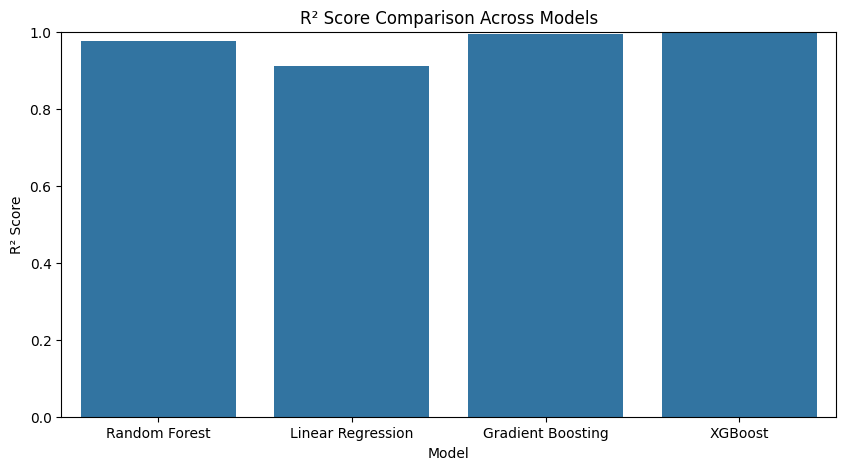

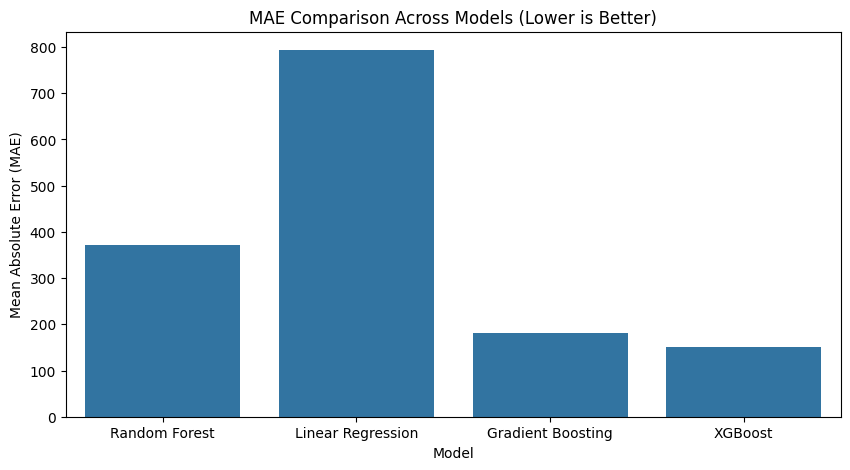

In [11]:
import matplotlib.pyplot as plt

# Plot comparison of R² Scores
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R² Score"])
plt.title("R² Score Comparison Across Models")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

# Plot comparison of MAE
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["MAE"])
plt.title("MAE Comparison Across Models (Lower is Better)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.xlabel("Model")
plt.show()


In [12]:
import joblib
from google.colab import files

# Save the best model (XGBoost)
joblib.dump(models["XGBoost"], "car_price_xgboost.pkl")

# Download the model for PyCharm use
files.download("car_price_xgboost.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
gitinit


NameError: name 'gitinit' is not defined